# Plotnine and the Grammar of Graphics

Plotting is one of the most important tools of data science, not only for effectively communicating findings to others, but also for exploring and understanding data for oneself. Plotting data allows us to leverage the astounding ability of humans to recognize visual patterns to help us understand data. To do so effectively, however, we need to think carefully about how our visual pattern recognition abilities work, and how we can use that knowledge to effectively present our data. 

In this reading, we will learn all about how to make plots using the [plotnine](https://plotnine.org/) plotting library for statistical data visualization (which emulates the ggplot library from R in Python). 

Before we dive into the specifics of the package, however, we need to talk about the philosophy of data visualizations that underlies how it works: the *Grammar of Graphics*.

## The Grammar of Graphics

The *Grammar of Graphics* is a framework for thinking about visualization developed by [Leland Wilkinson](https://www.amazon.com/gp/product/0387245448/). Its core idea is that any visualization can be decomposed into several constituent parts:

- **The Data:** at the core of any visualization, of course, is the data that were hoping to visualize.
- **Geometries:** To visualize our data, we must of course represent the data with actual *geometries* (geometric objects) on our figure. These include not only the axes that give our figure form, but also points, circles, bars, or other geometric shapes that populate our figure.
- **Encoding or "Aesthetic Mappings":** Finally, to tie our data to the marks in our figure, we must decide on a mapping from data to marks. This *encoding* of data into visual features is where the magic happens. In order to represent our data in a figure, we must *encode* different aspects of our data into the various visual features of our figure. For example, in a simple scatter plot, we *encode* information about one variable in the location of points along the x-axis, and encode information about another variable in locations along the y-axis. Then in the resulting figure, we would say that we have encoded information about two input variables in the location of points in our figure. Note encodings are sometimes referred to as "aesthetic mappings," but I will confess I find that confusing.
- **Channels:** The visual features of our plot into which we may encode information are called "channels." Some channels are obvious — in a scatter plot, for example, one channel may be the location of points along the x-axis while another channel is the location of points along the y-axis. But there are other channels into which we can also encode data, like the size, shape, or color of points (e.g. making points larger for, say, more populous countries). Each of these different ways information can be encoded is called a "channel."

Putting these together, we can say that when we make a figure, we are communicating information about our *data* by *encoding* information about the value of different variables in the different *channels* made possible my our *marks*.

(To be clear, there are some really interesting nuances to Wilkinson's work that I can't do justice to in the space I have here, including discussion of scales, which I'm ignoring for now, but those are the basics!)

This decomposition is especially powerful because it gives rise to a model of graphics that is inherently *modular* and *composable*. This is not only helpful when thinking about how to make a good data visualization, but as we will see it is also an obvious foundation for a modular, composable way to specify figures in code. Indeed, it is for this reason that so many popular plotting libraries had been organized around the Grammar of Graphics, including not only the package we will focus on today (seaborn), but also the immensely popular ggplot in R, Altair in Python, Vega in Javascript, and more.


## How plotnine (and ggplot2) Embodies the Grammar of Graphics

Before diving into the nuances of seaborn, let's begin with a simple example to illustrate how the Grammar of Graphics (GoG) manifests in code. In the example below, let's use a canonical example dataset on penguins (which comes included with seaborn) to examine the relationship between penguin mass and other physical features:

In [1]:
# Import pandas and seaborn.objects
import pandas as pd
import numpy as np
import plotnine as pn
from plotnine import aes  # We use aes so much worth a direct import.

pd.set_option("mode.copy_on_write", True)

# Load penguins dataset
from plotnine.data import penguins

penguins = penguins.dropna()

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let us start by just looking at the relationship between body mass and bill length:

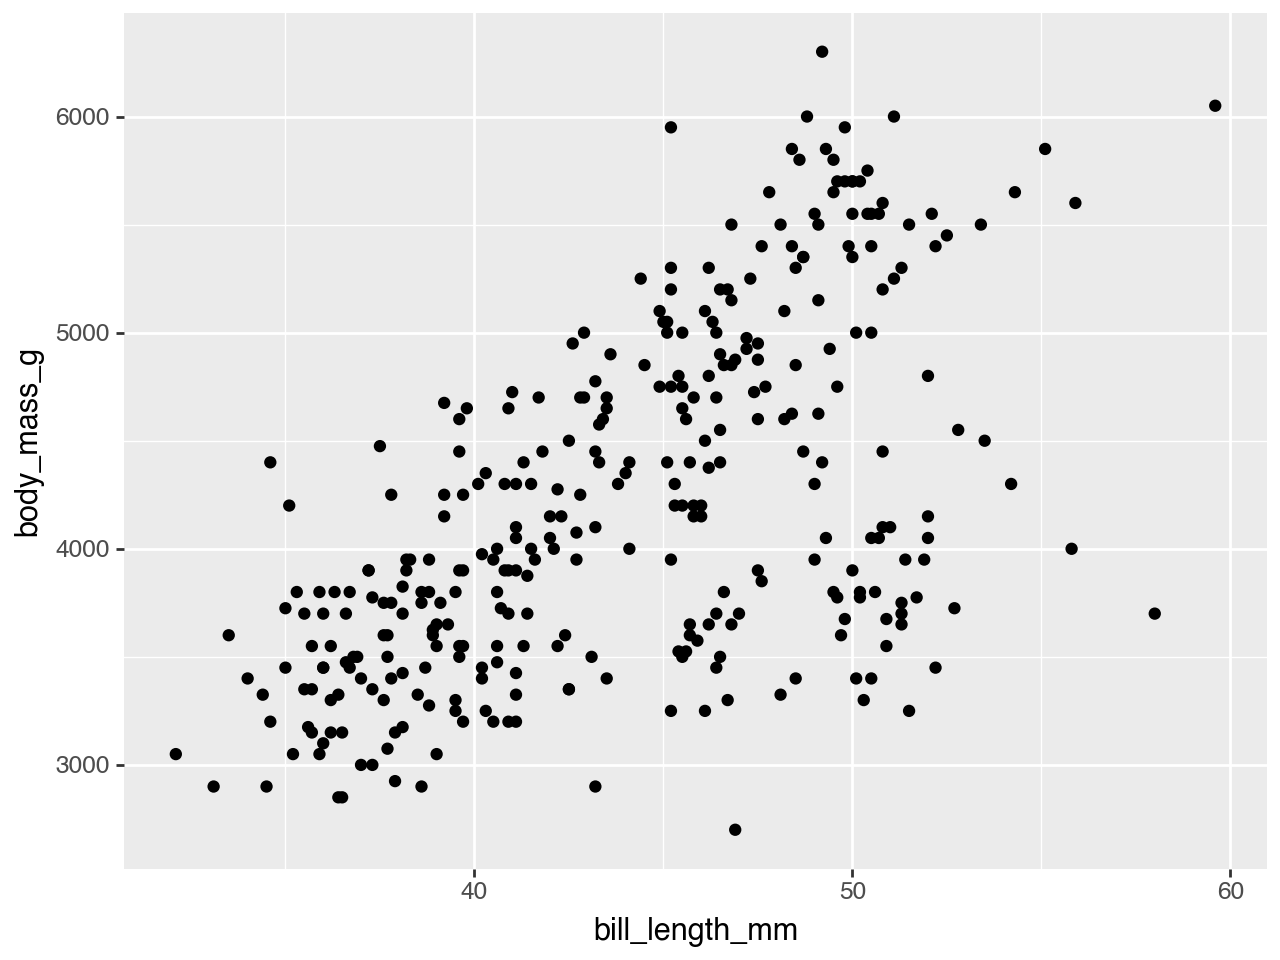

In [3]:
pn.ggplot(penguins, aes(x="bill_length_mm", y="body_mass_g")) + pn.geom_point()

Here, you can see that the first thing we've passed is our *Data* (`penguins`), we've added `geom_point()` as our *Geometries*, and we've *encoded* `bill_length_mm` into the x-axis location of our points, and `body_mass_g` into the y-axis location of our points. 

The `aes` function is where features of the data are *encoded* to specific features of the plot. `aes` is short for `aesthetics`, and plotnine (like ggplot) refers to the encoding of data properties to visual elements of the plot as "aesthetic mappings."

As I said before, the most powerful part of a GoG-inspired syntax is that it's extremely modular. Suppose, looking at this, we notice a strong upward trend through the middle of the data, but also a weird mass in the bottom right. What might that be? Well, let's go fishing! Let's encode some additional information in our figure through the *channel* of dot color:

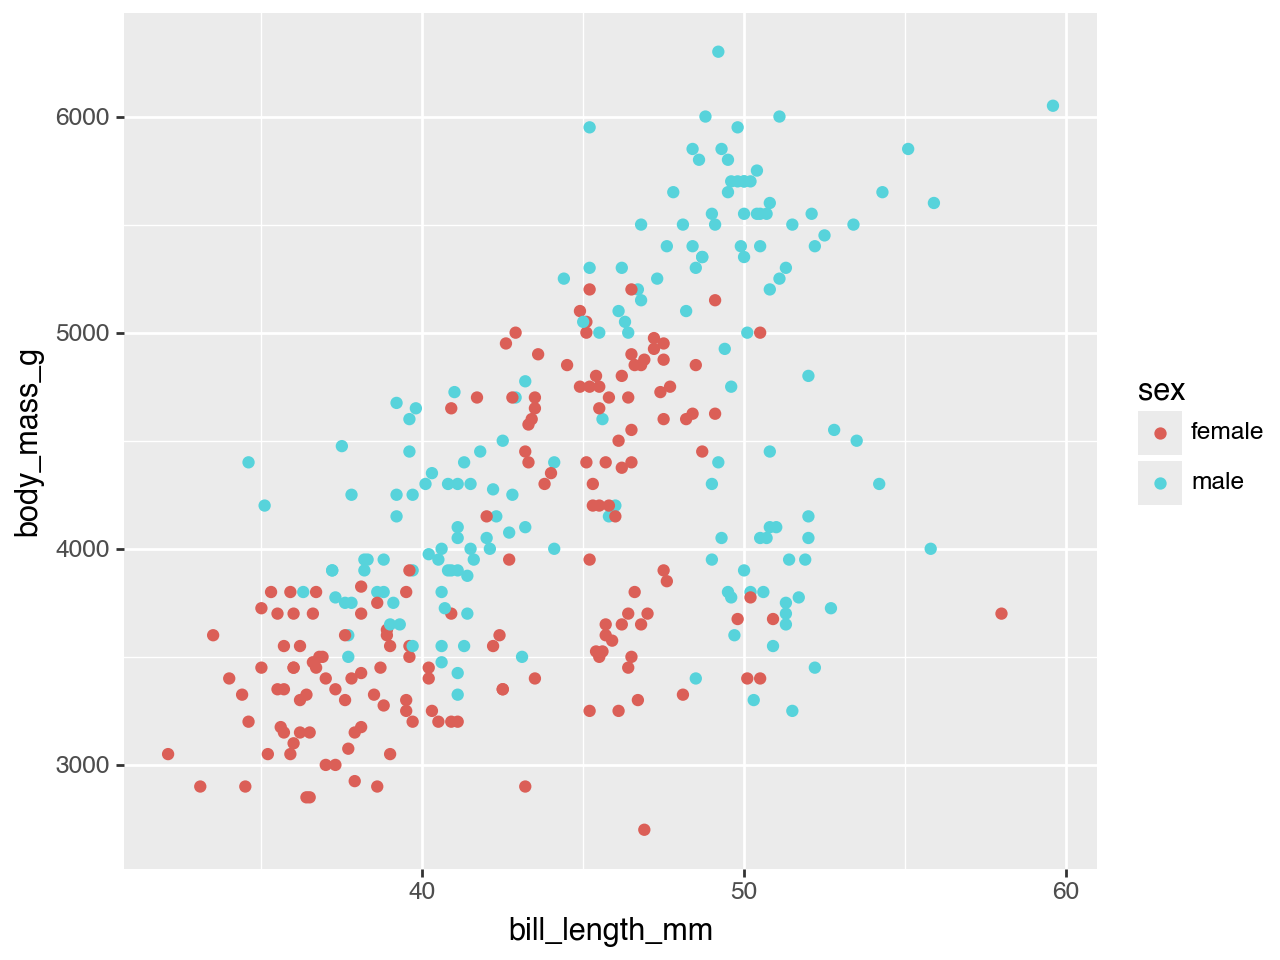

In [4]:
(
    pn.ggplot(penguins, pn.aes(x="bill_length_mm", y="body_mass_g", color="sex"))
    + pn.geom_point()
)

Great! And just like that, we can easily see that while female penguins do tend to be smaller than their male counterparts, that doesn't explain this weird shape of the data. Slits and code a different variable — `species`!

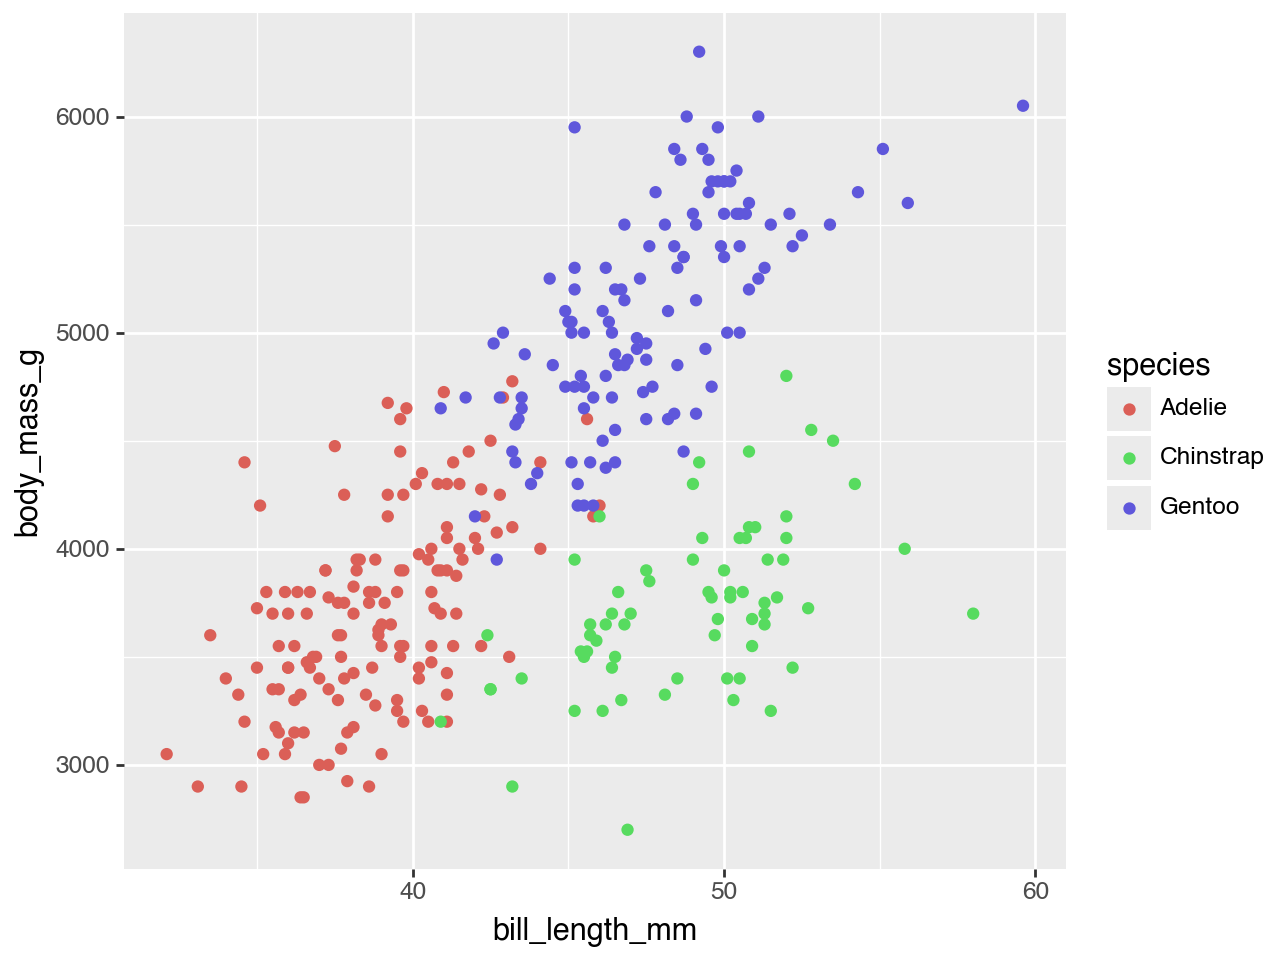

In [5]:
(
    pn.ggplot(penguins, pn.aes(x="bill_length_mm", y="body_mass_g", color="species"))
    + pn.geom_point()
)

Ah, there we go! That's clearly what explains much of this shape.

Notice how powerful that was — we were able to think in terms of the features of the data we wanted to understand, and we were able to uncover a pattern relatively quickly that would have been extremely difficult to [grok](https://en.wikipedia.org/wiki/Grok) (really understand at an intuitive level) using summary statistics or non-visual data tabulations.

## plotnine, GDP per Capita, and Economic Development

To better demonstrate not only the ins-and-outs of the seaborn plotting library, but also how plotting can be used for exploratory data analysis, let's take a look at the relationship between average income and different measures of human development.

Among people who are interested in trying to improve living conditions in developing countries around the world, one canonical debate is about whether the best way to help those most in need is to focus on encouraging economic growth writ large, or whether it would make more sense to focus on specific interventions around things like infant mortality or the education of girls.

Many economists argue that encouraging economic growth may actually be the most efficient way of achieving improvements in human development not because economic growth itself is intrinsically valuable, but because economic growth tends to be associated with improvements in lots of other things that we care about, presumably because a better functioning economy and wealthier citizens are better able to build the institutions and public service delivery systems necessary to provide access to schools and public health everyone.

Others argue that efforts to encourage economic growth are targeting an outcome that we don't actually care about (income) rather than targeting the things that we are actually trying to encourage (higher life expectancy, equal access to education, etc.). In this view, targeting the specific outcomes is much more likely to help us achieve the things that we care about most.

(Of course, it's worth emphasizing that this way of framing the debate is simplistic -- this is not an either/or proposition, and efforts can be directed in both directions. But in a world of scarce resources, practitioners do sometimes have to decide whether they allocate resources to encouraging economic growth through, say, small business loans versus putting money into building schools.)

In an effort to move beyond debating this in the abstract, in this lesson we will use Altair to look at patterns between economic growth (measured in terms of average incomes in different countries, measured as Gross Domestic Product (GDP) per capita) and other development outcomes (life expectancy, literacy, etc.). We will be doing so using data from the World Development Indicators (WDI) database from the World Bank that provides country-level data on a range of outcomes. 

## Loading WDI Data

The data we'll be using can be found [here](https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/wdi_plotting.csv). This is *basically* straight from the [WDI website](https://datacatalog.worldbank.org/dataset/world-development-indicators), though I've made a couple small formatting changes to make life a little easier.

Let's begin by loading the data and getting a quick sense of what we have:

In [6]:
wdi_data = (
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)
world = pd.read_csv(wdi_data)
world.sample(5)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
2475,1982,Iceland,ISL,NaN,233860.0,6.836620,NaN,NaN,77.037805,8.7,NaN
10613,2019,Tunisia,TUN,4404.992787,11694721.0,NaN,NaN,NaN,76.699000,16.9,NaN
4080,1989,Slovenia,SVN,NaN,1996351.0,NaN,NaN,NaN,72.704878,11.1,NaN
5969,1998,Lebanon,LBN,5899.938790,3693514.0,4.399604,NaN,NaN,73.528000,22.0,NaN
6202,1999,Mauritius,MUS,5285.549777,1175267.0,1.871915,NaN,NaN,70.960976,20.4,NaN


We can also look at the columns in the dataset a little more systematically:

In [7]:
for c in world.columns:
    print(c)

Year
Country Name
Country Code
GDP per capita (constant 2010 US$)
Population, total
CO2 emissions (metric tons per capita)
Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)
PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
Life expectancy at birth, total (years)
Mortality rate, under-5 (per 1,000 live births)
Literacy rate, youth female (% of females ages 15-24)


And finally, we can look at the years that are included in the data:,

In [8]:
world.Year.describe()

count    10850.000000
mean      1995.500000
std         14.431535
min       1971.000000
25%       1983.000000
50%       1995.500000
75%       2008.000000
max       2020.000000
Name: Year, dtype: float64

And the number of countries (although we can already see from the sample above that not all countries have all variables defined in every year):

In [9]:
# How many countries?
world["Country Name"].nunique()

217

## Basic Descriptive Plotting

Given our interest in the relationship between average income and human development, let's start by looking at the relationship GDP per capita and the standard measure of the quality of public health in a country: the mortality rate for young children.

To start, let's also limit our attention to data from a single year -- we can look at variation over time later. 

In [10]:
world = world[world.Year == 2018]

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


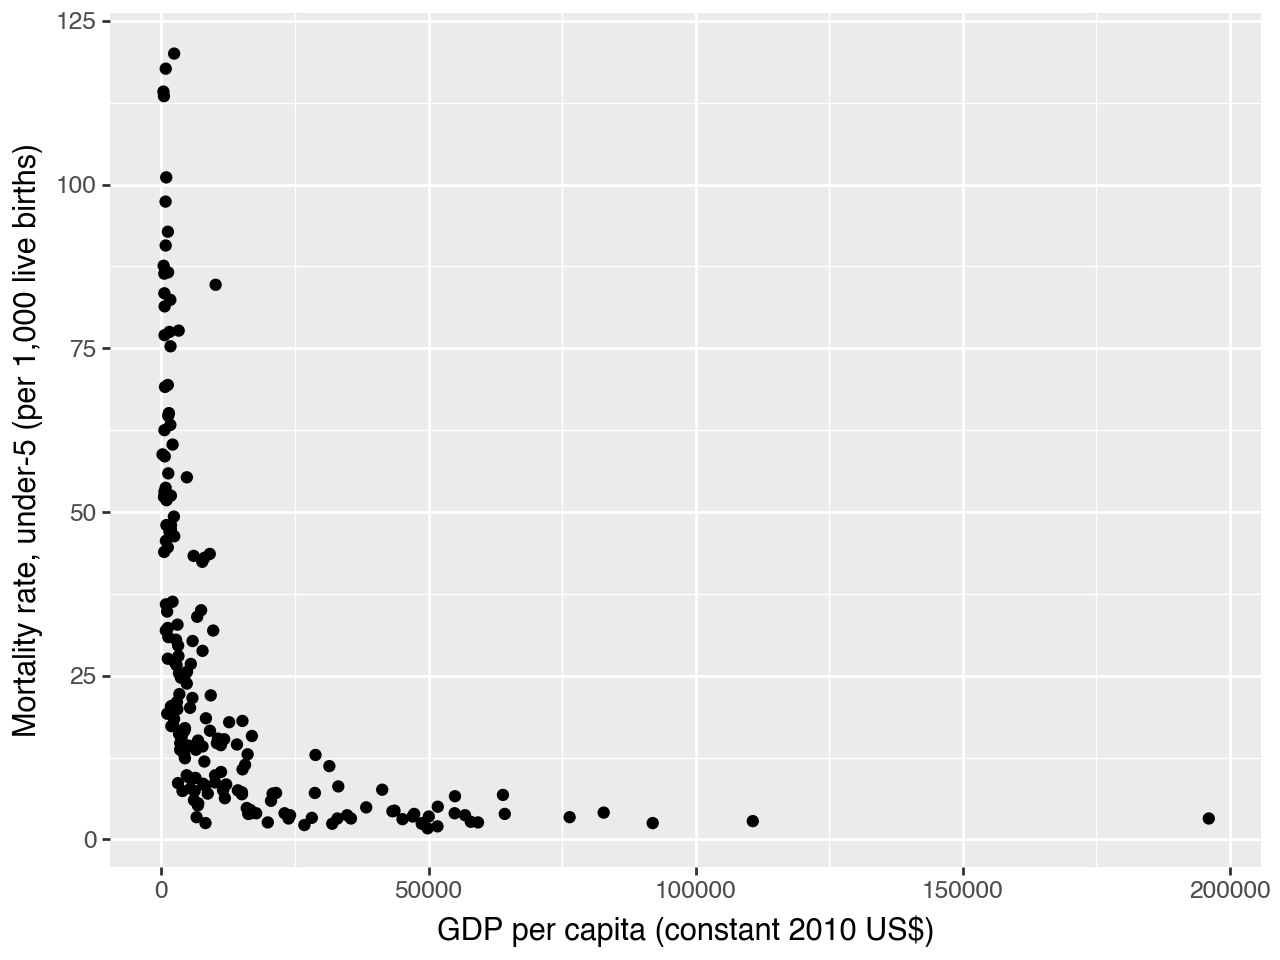

In [11]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="GDP per capita (constant 2010 US$)",
            y="Mortality rate, under-5 (per 1,000 live births)",
        ),
    )
    + pn.geom_point()
)

Here we immediately see one of the great things about plotting -- we can instantly recognize that this relationship is not remotely linear, which is important to know because it means any analysis designed to measure linear relationships (like a simple correlation or a linear regression) would be misleading. Moreover, not only do we see it's non-linear, but we can get a sense of the *way* in which it's non-linear!

(Yes, there are ways to learn this without plotting, but those approaches tend not to tell us what functional form the relationship actually takes, and can often be fooled by certain non-linear relationships in a way your eye is not! Indeed, even the standard way of validating the linearity assumption in a linear regression is to **plot** your residuals for this precisely reason.)

So let's log our variables to get something more linear and easy to interprete:

In [12]:
world["log_gdp_per_cap"] = np.log(world["GDP per capita (constant 2010 US$)"])
world["log_under5_mortality_rate"] = np.log(
    world["Mortality rate, under-5 (per 1,000 live births)"]
)
world["log_population"] = np.log(world["Population, total"])

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


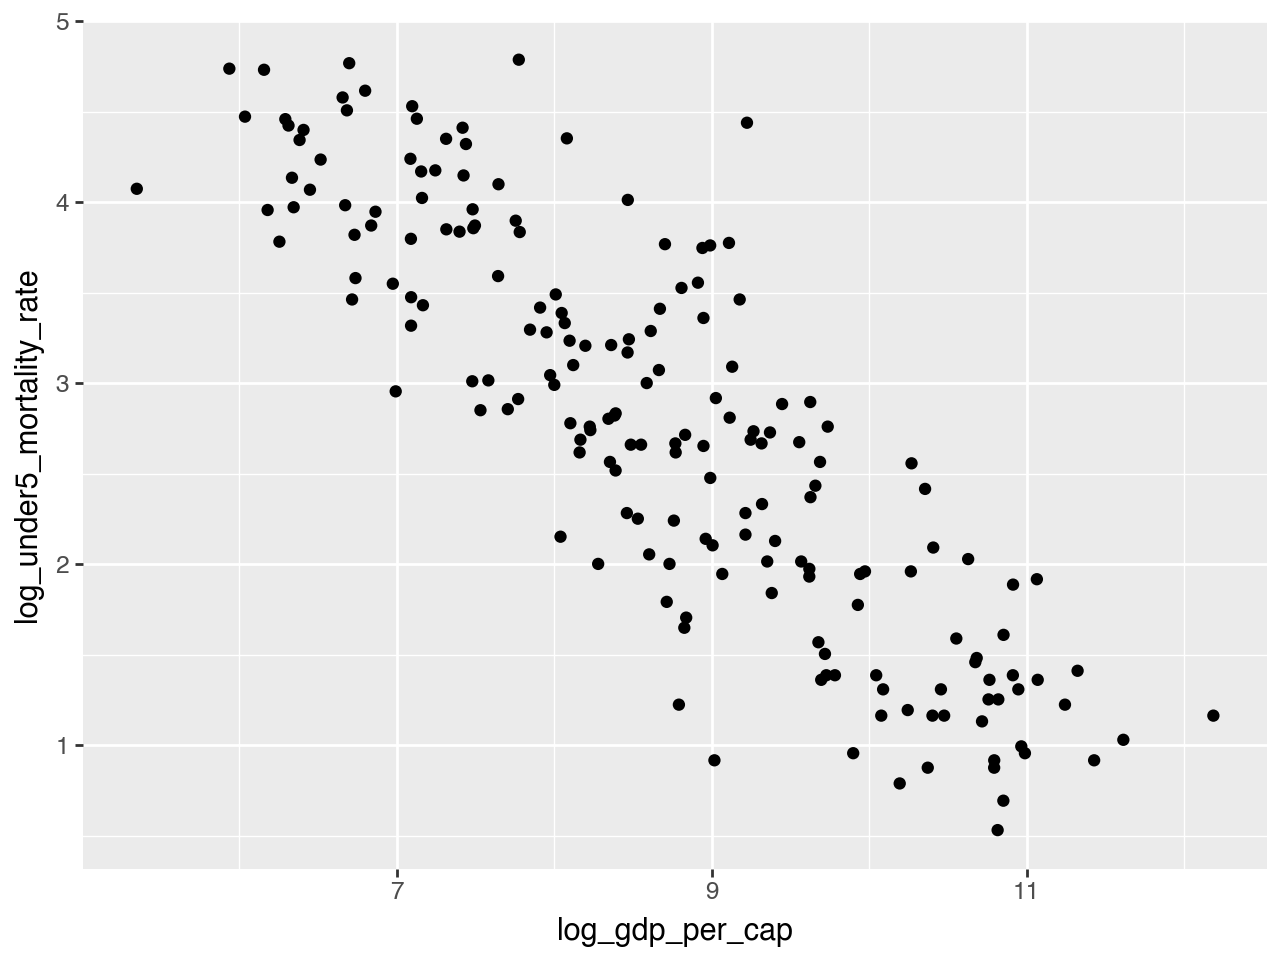

In [13]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap",
            y="log_under5_mortality_rate",
        ),
    )
    + pn.geom_point()
)

*Much* better. Here we can clearly see a nice, linear relationship between logged GDP per capita and logged child mortality.

## Adding More Channels

So far we've made great progress on the question we were asking: does average income seem to be strongly correlated with childhood morality? Yes, they are clearly strongly correlated, though with some dispersion of outcomes at each income level. 

But as we saw above, we have more than 200 countries in this dataset, and each country is represented by a single point in that figure. This is equitable, but perhaps misleading -- if we're interested in human welfare, then not all countries are equally important; after all, nearly half of all people alive live in [only 7 countries](https://www.pewresearch.org/fact-tank/2018/07/11/world-population-day/#:~:text=More%20than%20half%20of%20all%20people%20around%20the,population%20%281.42%20billion%29%2C%20followed%20by%20India%20%281.35%20billion%29.)! What if this relationship between childhood mortality is true for small countries, but not big ones, but we can't see it because all countries are being plotted the same way? 

One way to address this is to encode additional data -- the population of each country -- to another channel. The location of points on x and y axes are, of course, the most obvious encoding channels in a visualization, but they are *far* from the only ones available! Indeed, Altair allows information to be encoded in a range of mark features, including:

- Color
- Size
- Shape
- Stroke (for lines)
- Opacity

and more. 

So let's add one of these to our data -- let's encode population in the size of our points, so big countries get bigger points! That way we can see if big countries also seem to be following this trend we see:

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


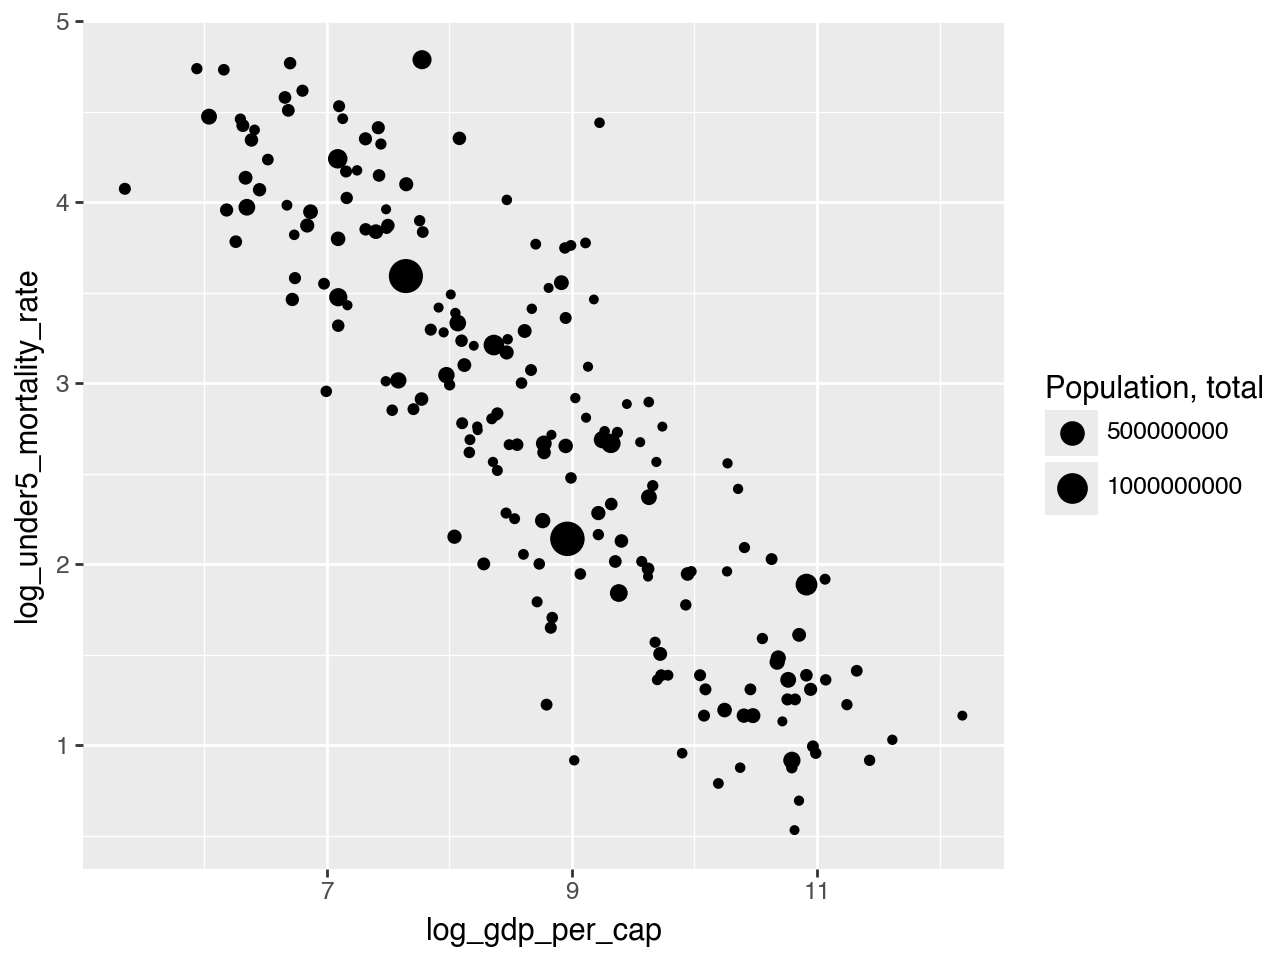

In [14]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap",
            y="log_under5_mortality_rate",
            size="Population, total",
        ),
    )
    + pn.geom_point()
)

And just like that we have added *substantial* information to our figure! In this case, what we've learned is that the linear relationship we see for all countries is similar to the linear relationship we see if we focus only on big countries (since we see the bigger circles distributed all along the same general line as the smaller points), which should re-assure use that the relationship we see holds both for the average country *and* for the average person.

## The Encoding Channel Hierarchy

In the figure above, we encoded GDP per capita to each point's x-axis location, Mortality to each point's y-axis location, and population to point size. But why are encoding GDP and Mortality to x-y locations, and population to size? We could have just as easily encoded population in x-axis locations, and GDP in size:

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


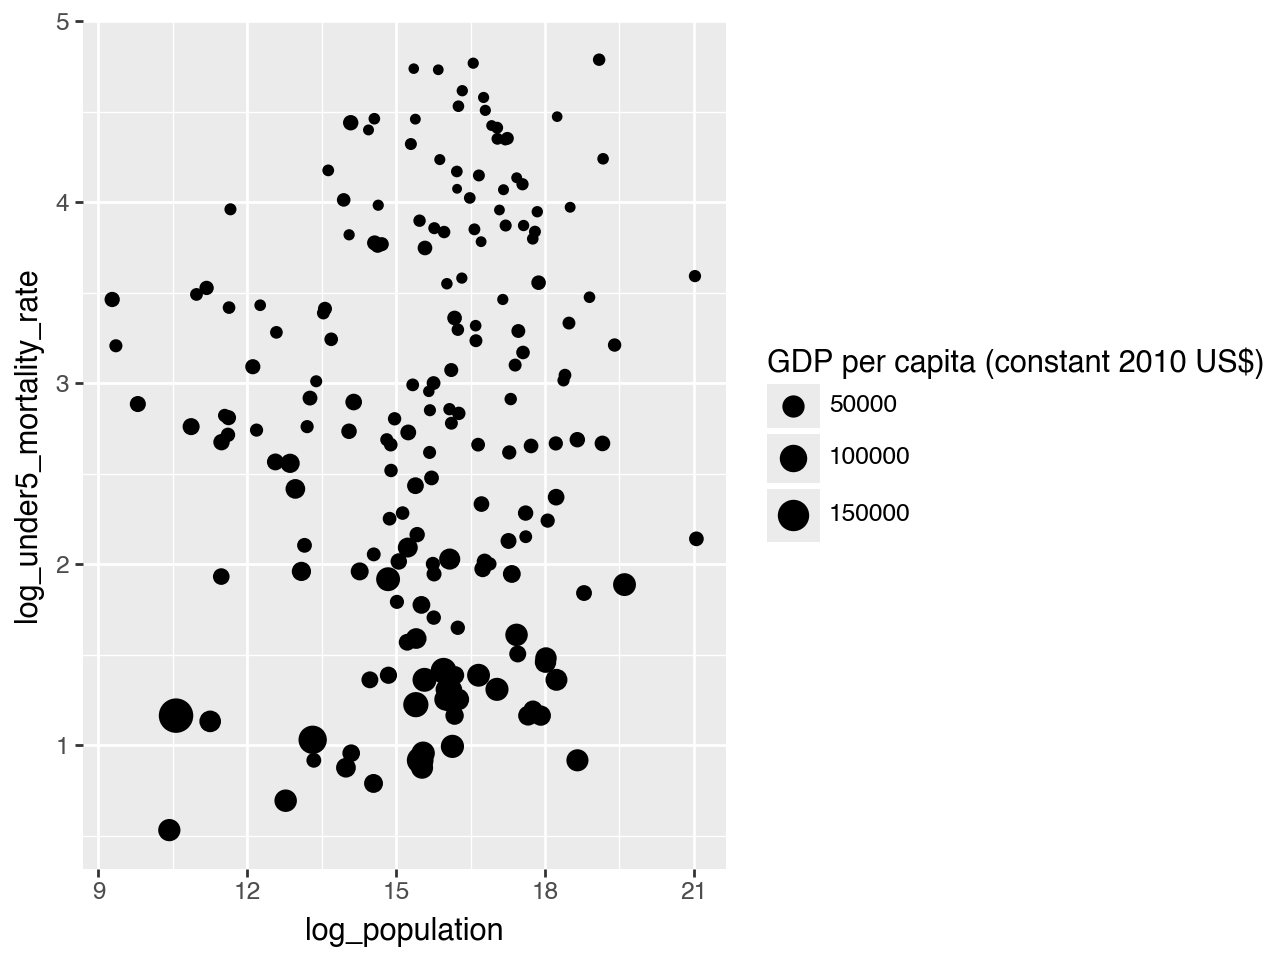

In [15]:
world["log_population"] = np.log(world["Population, total"])
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_population",
            y="log_under5_mortality_rate",
            size="GDP per capita (constant 2010 US$)",
        ),
    )
    + pn.geom_point()
)

But when we look at that figure, we immediately get the sense we've done something wrong. Why?

The answer is that not all encoding channels are created equal. Our visual pattern recognition system is more sensitive to some channels (like x-y locations) than others (size). In the figure above, for example, the pattern between GDP and Mortality is still present, the problem is that it manifests as the marks being ever so slightly larger at the bottom of the figure than at a top, a difference that's really hard to see.

(Why is this the case? While it's always dangerous to play armchair evolutionary biologist, it's not hard to imagine a reason we are so sensitive to location. Misperceive the location of an object even a little and your spear throw goes awry, or you foot misses the rock you were trying to step on. Misperceive the size of an apple a little and... well, there are probably no consequences!)

This idea of a hierarchy of encoding channels is explored in detail in Jacques Berin's *Semiology of Graphics*. As with the Grammer of Graphnics, I won't go into all of the thoughtful nuance from the original book, but in short Jacques argues that the top of the channel hierarchy is (in decreasing order of desirability):

- Position
- Size
- Color
- Shape

(There are all sorts of nuance for data that's categorical versus cardinal, and different rules for points versus lines versus shapes, but crucially in *all* cases position is at the top!)

And that's why this figure seems so wrong -- we haven't used position to encode the relationship we care about **most**, but instead used a mixture of position (for Mortality) and size (for GDP per capita), obscuring what we most want to understand. 

In our original figure, by contrast, we encoded a *secondary* variable of interest (population) into a secondary channel (size). And given we only wanted to quickly see if the relationship we were seeing was a relationship that was true for both large and small countries, this secondary channel was sufficient. But it's not sufficient for GDP per capita.

## Layering

One feature of this plot is that we see a significant relationship between GDP per capita and child mortality, but we also see that there is some dispersion of outcomes around that trend -- even at the same income level, some countries are outperforming others in terms of reducing child mortality.

To make this easier to visualize, it may be helpful to add a line-of-best-fit (e.g. a linear regression line) to our plot — something that seaborn (as a statistical data visualization library) makes very easy!

First, we need to recognize that we're trying to add a new *Geometry* to our figure — in this case, a line. We do this by adding `+ geom_smooth(method="lm")` to the end of our current plot. In this case, `method="lm"` means we want a linear model (linear regression) fit on the data, but you can also pass arguments like `"lowess"` for a lowess fit.


/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


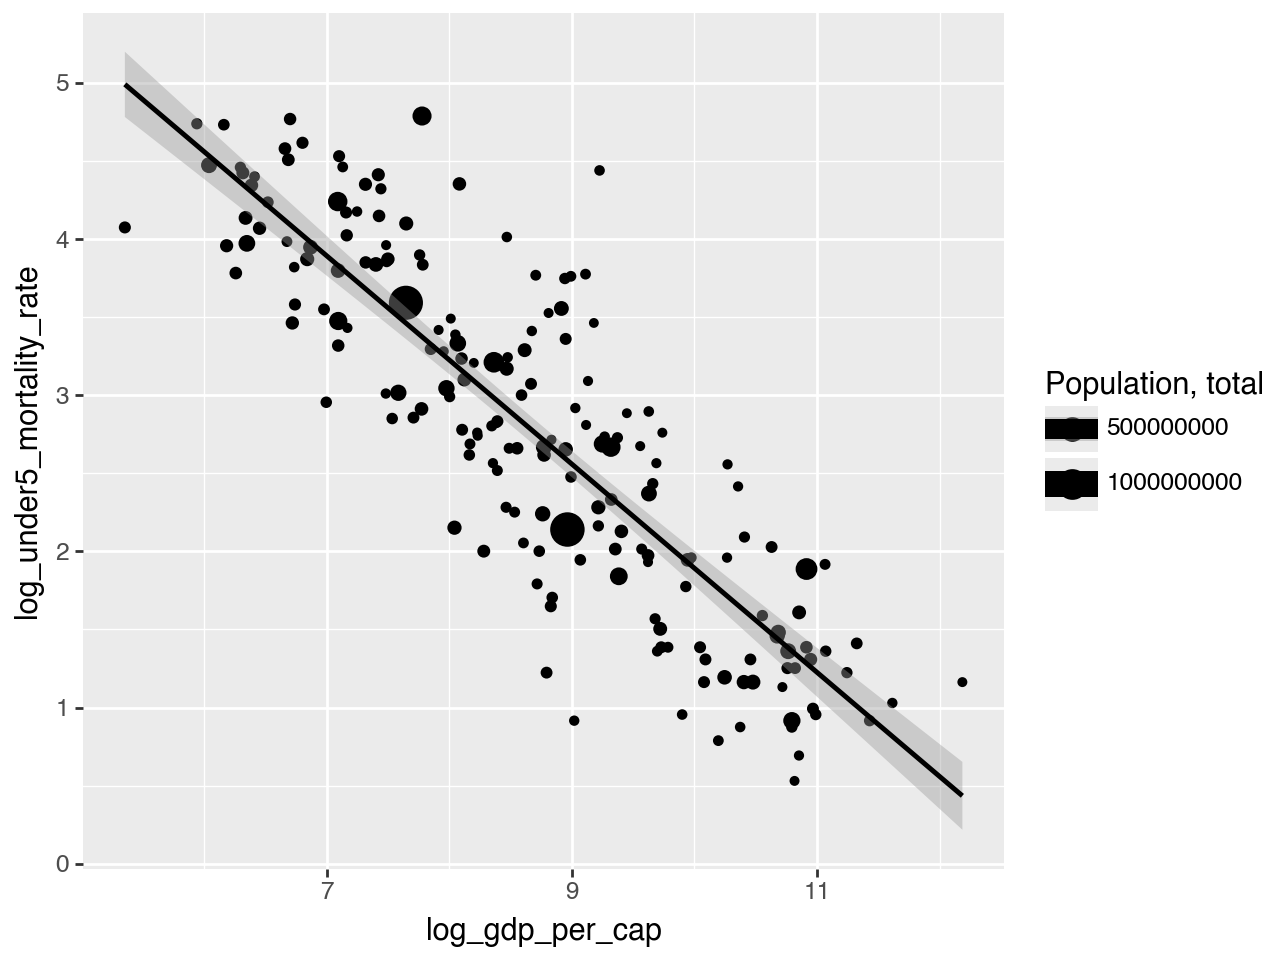

In [16]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap", y="log_under5_mortality_rate", size="Population, total"
        ),
    )
    + pn.geom_point()
    + pn.geom_smooth(method="lm")
)

### Layer-Specific Encodings

On nuance to encodings (aesthetic mappings) with multiple geometries is that one must be careful about *how* one specifies an encoding, as encodings specified in different ways will apply either to all marks, or only to one mark.

Basically, if you specify an encoding inside `ggplot(aes())`, it will apply to all geometries. If, by contrast, you add an encoding *inside* a specific geometry's `aes()` function, it will only apply to that geometry. And if you want to just modify a geometry (not by encoding it to a variable, but just change a setting), you put that change in the geometry itself (e.g., `geom_point(size=10)`).

Here's a great visual from the seaborn documentation on this point (they use the term "mapped" instead of "encoded"):

![plotnine encoding rules](img/objects_interface_encodings.svg)


We can also see how this kind of layer-specific specification works through the addition of the names of countries to our plot. This gets pretty busy and this is probably too much on a plot, but it's the kind of thing that can be useful for data exploration.

First, we want to add a new geometry: `pn.geom_text()`. But if we want to country codes into our text labels by adding `"label=Country Code"` and not making other changes, nothing happens: 

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.
/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_text : Removed 31 rows containing missing values.


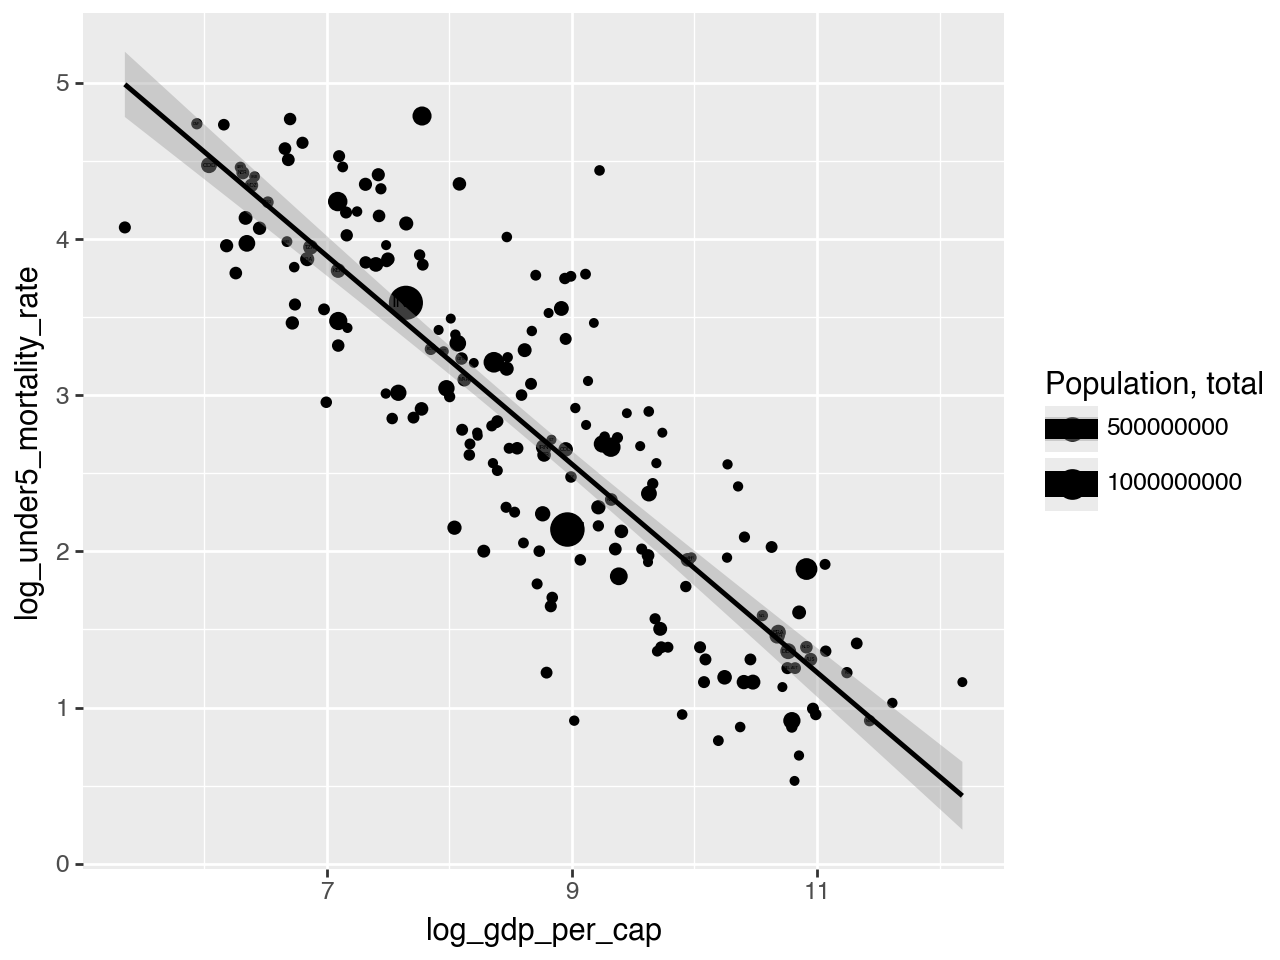

In [17]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap",
            y="log_under5_mortality_rate",
            size="Population, total",
            label="Country Code",
        ),
    )
    + pn.geom_point()
    + pn.geom_smooth(method="lm")
    + pn.geom_text()
)

Why? Well, what's actually happening is that size isn't just changing the size of our dots, it's also changing the size of the text labels. For most countries, that makes them unreadably small, and for China and India, the text label is small enough you can't see it because of the big points. 

We can see this if we use `alpha` to make our points more transparent (`alpha` is a measure of opacity — 1 is opaque and 0 is transparent). Note I am not mapping the alpha property onto something in the data, so I will keep it outside of `aes`:

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.
/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_text : Removed 31 rows containing missing values.


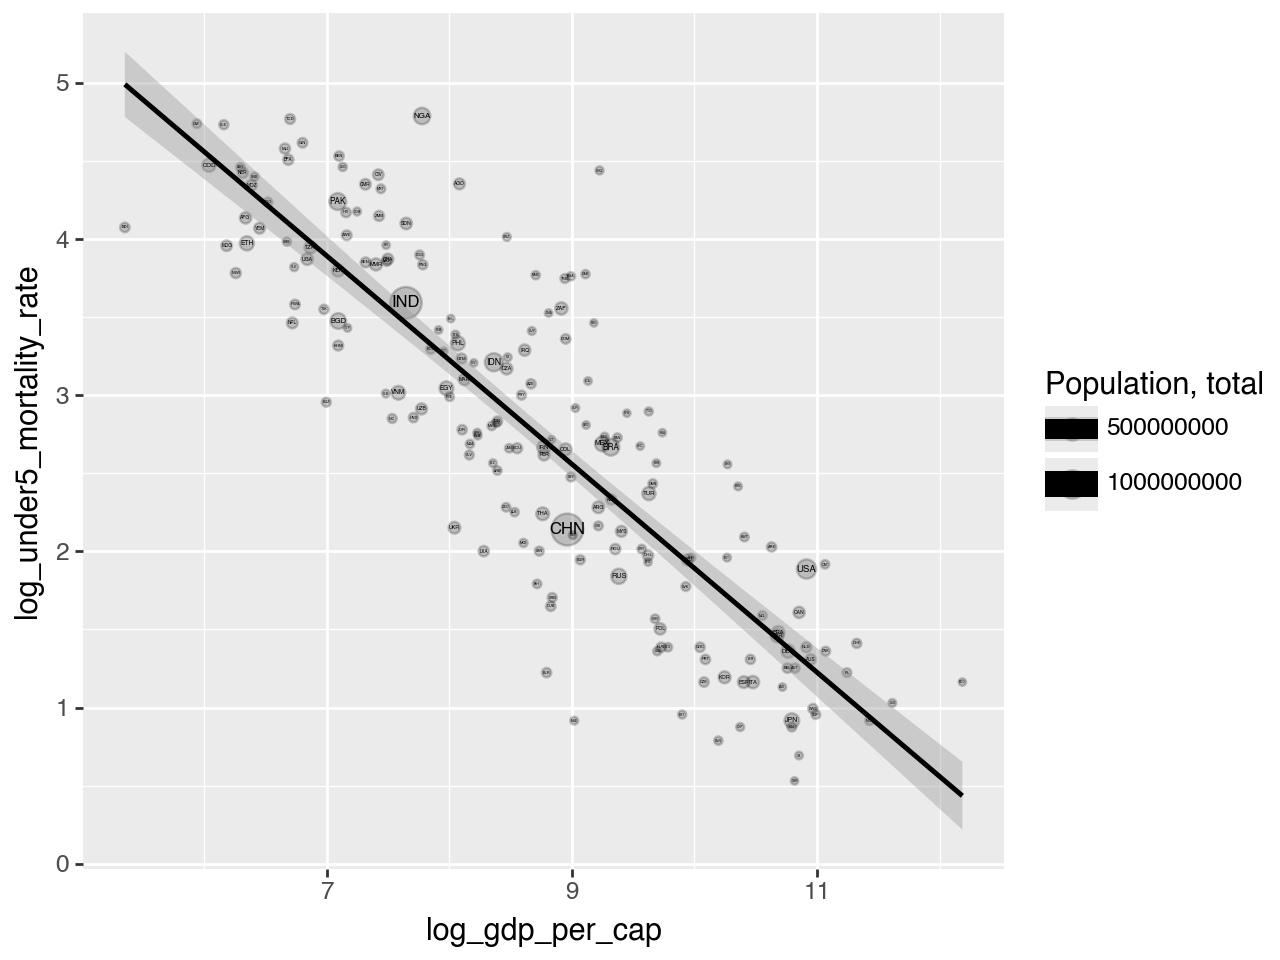

In [18]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap",
            y="log_under5_mortality_rate",
            size="Population, total",
            label="Country Code",
        ),
    )
    + pn.geom_point(alpha=0.2)
    + pn.geom_smooth(method="lm")
    + pn.geom_text()
)

Oof!  Now the text labels are too big! But now we can set size separately for text labels:

So let's move size out of the main `aes` and down into `geom_point`:

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.
/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_text : Removed 31 rows containing missing values.


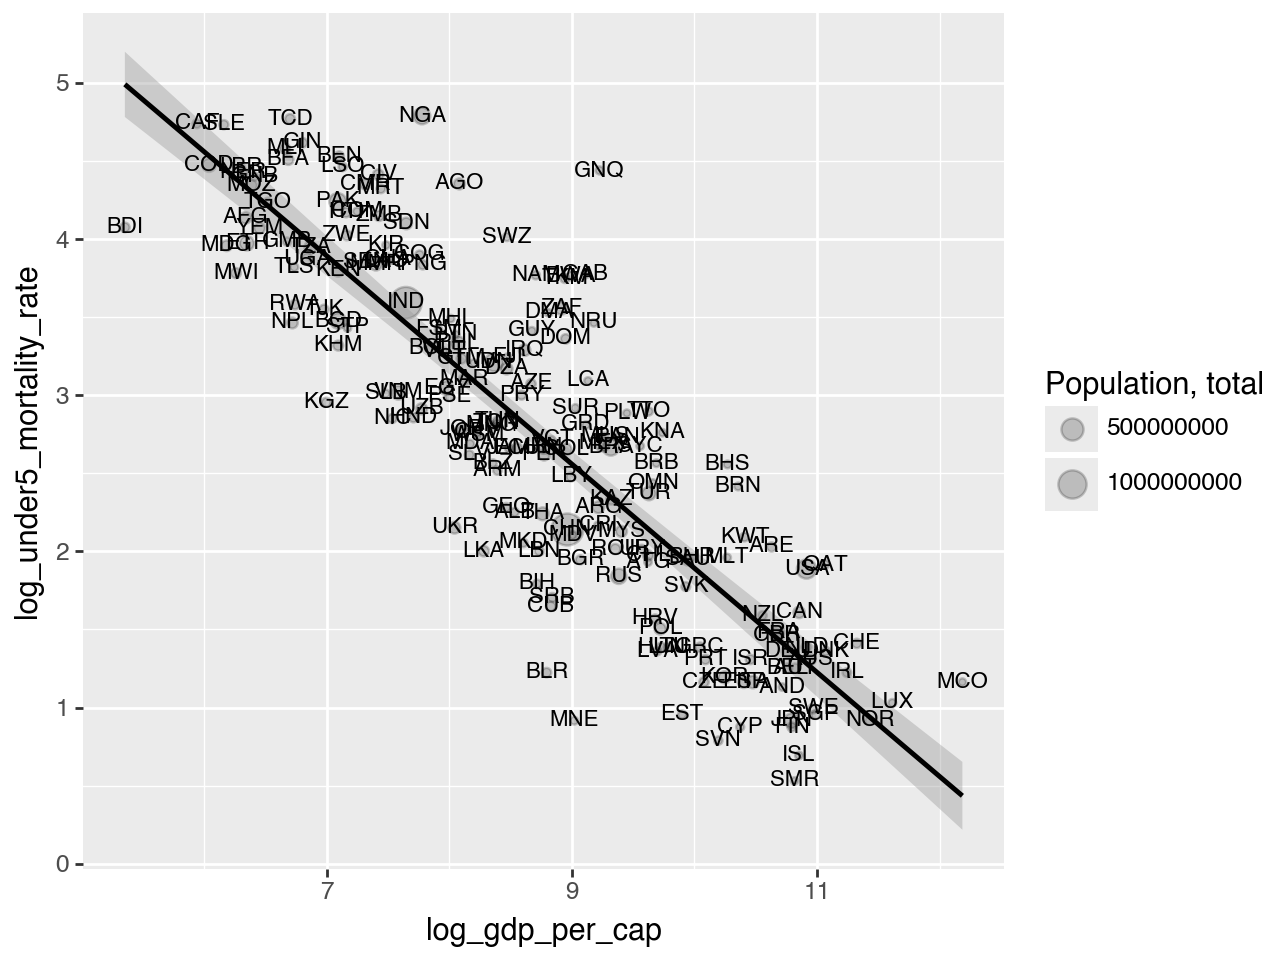

In [19]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap",
            y="log_under5_mortality_rate",
            label="Country Code",
        ),
    )
    + pn.geom_point(aes(size="Population, total"), alpha=0.2)
    + pn.geom_smooth(method="lm")
    + pn.geom_text(size=8)
)

Much better! Still not something I'd put in a paper, but that's it's helpful if I wanted to, say, figure out who my outliers were (like Nigeria, `NGA`).

Of course, we might also want to make this more readable by just dropping our Dots and just using text labels. 

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_text : Removed 31 rows containing missing values.


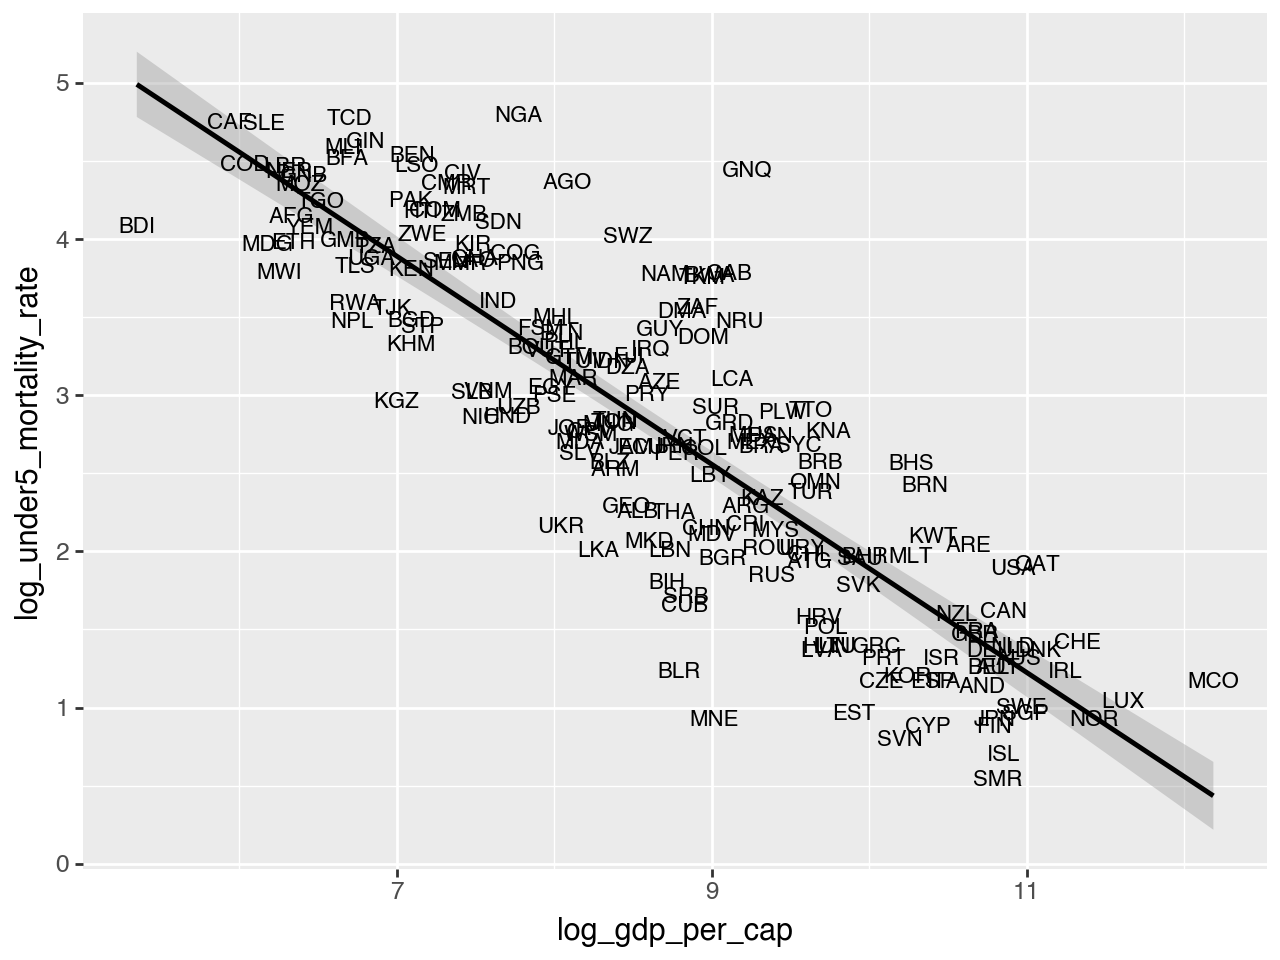

In [20]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap",
            y="log_under5_mortality_rate",
            label="Country Code",
        ),
    )
    + pn.geom_smooth(method="lm")
    + pn.geom_text(size=8)
)

## Adding Titles Labelling Axes

Now suppose you wanted to share what you'd discovered -- you'd probably want to clean up your variables names and titles! Thankfully, it's *very* easy! Just add `+ labs()` and the labels you want:

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


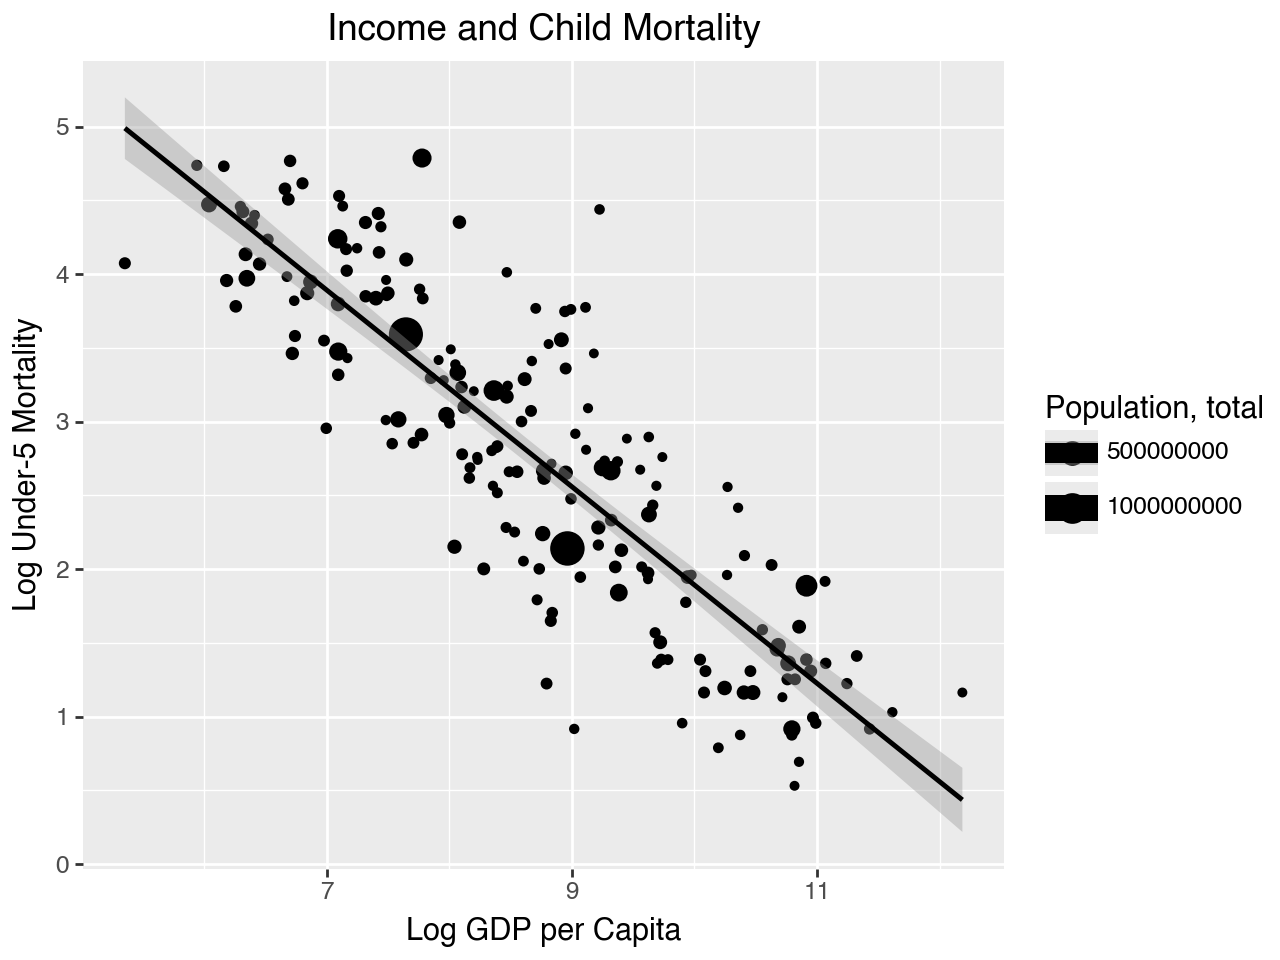

In [21]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap", y="log_under5_mortality_rate", size="Population, total"
        ),
    )
    + pn.geom_point()
    + pn.geom_smooth(method="lm")
    + pn.labs(
        x="Log GDP per Capita",
        y="Log Under-5 Mortality",
        title="Income and Child Mortality",
    )
)

## Themes

Want to customize the look of your plots? Great! plotnine has all the default themes you're used to [from ggplot (examples at the bottom)](https://ggplot2.tidyverse.org/reference/ggtheme.html#ref-examples), plus a few more and the ability to customize. Here's the [official list](https://plotnine.org/reference/#themes) and a guide on their [use here](https://plotnine.org/guide/overview.html#theme_-styling).

Just add `+ pn.theme_[name]()` to your figure to adopt a theme. And add `.to_retina()` if you like retina sizes.



/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


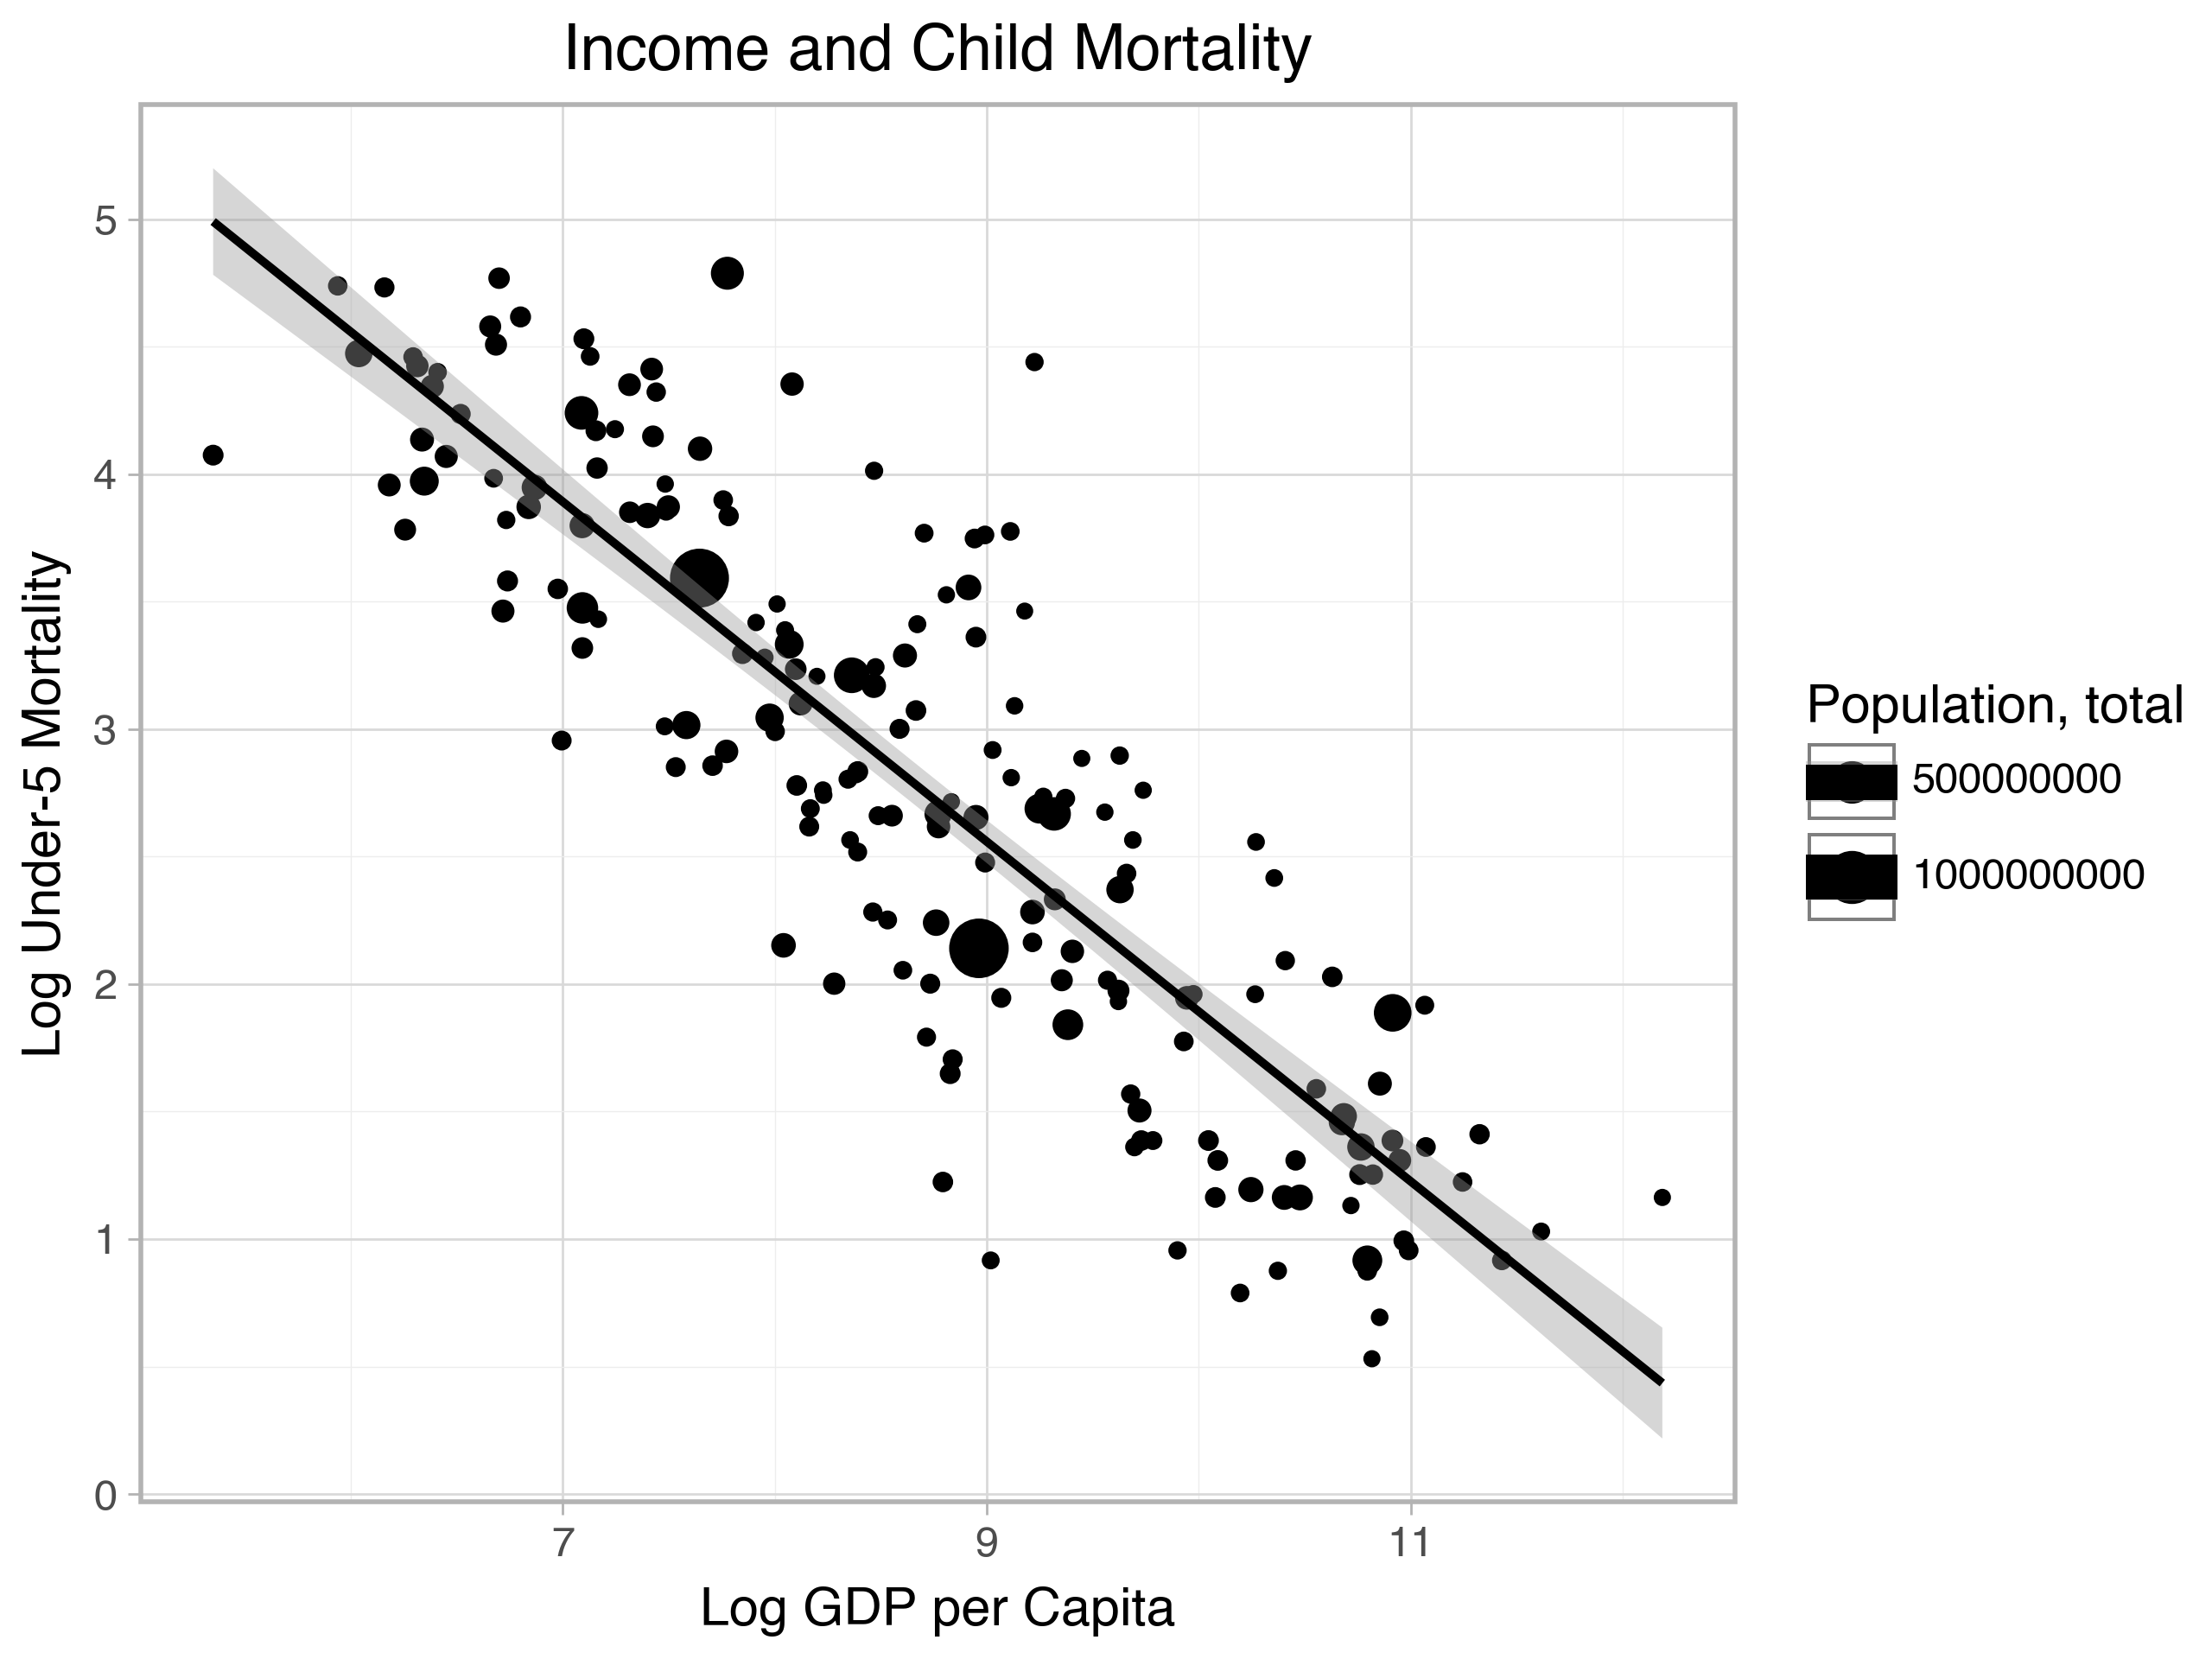

In [22]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap", y="log_under5_mortality_rate", size="Population, total"
        ),
    )
    + pn.geom_point()
    + pn.geom_smooth(method="lm")
    + pn.labs(
        x="Log GDP per Capita",
        y="Log Under-5 Mortality",
        title="Income and Child Mortality",
    )
    + pn.theme_light().to_retina()
)

In theory you can made arbitrary modifications to themes, though I'll admit that this is something I've struggled with in the plotnine documentation. But here's a change in font:

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


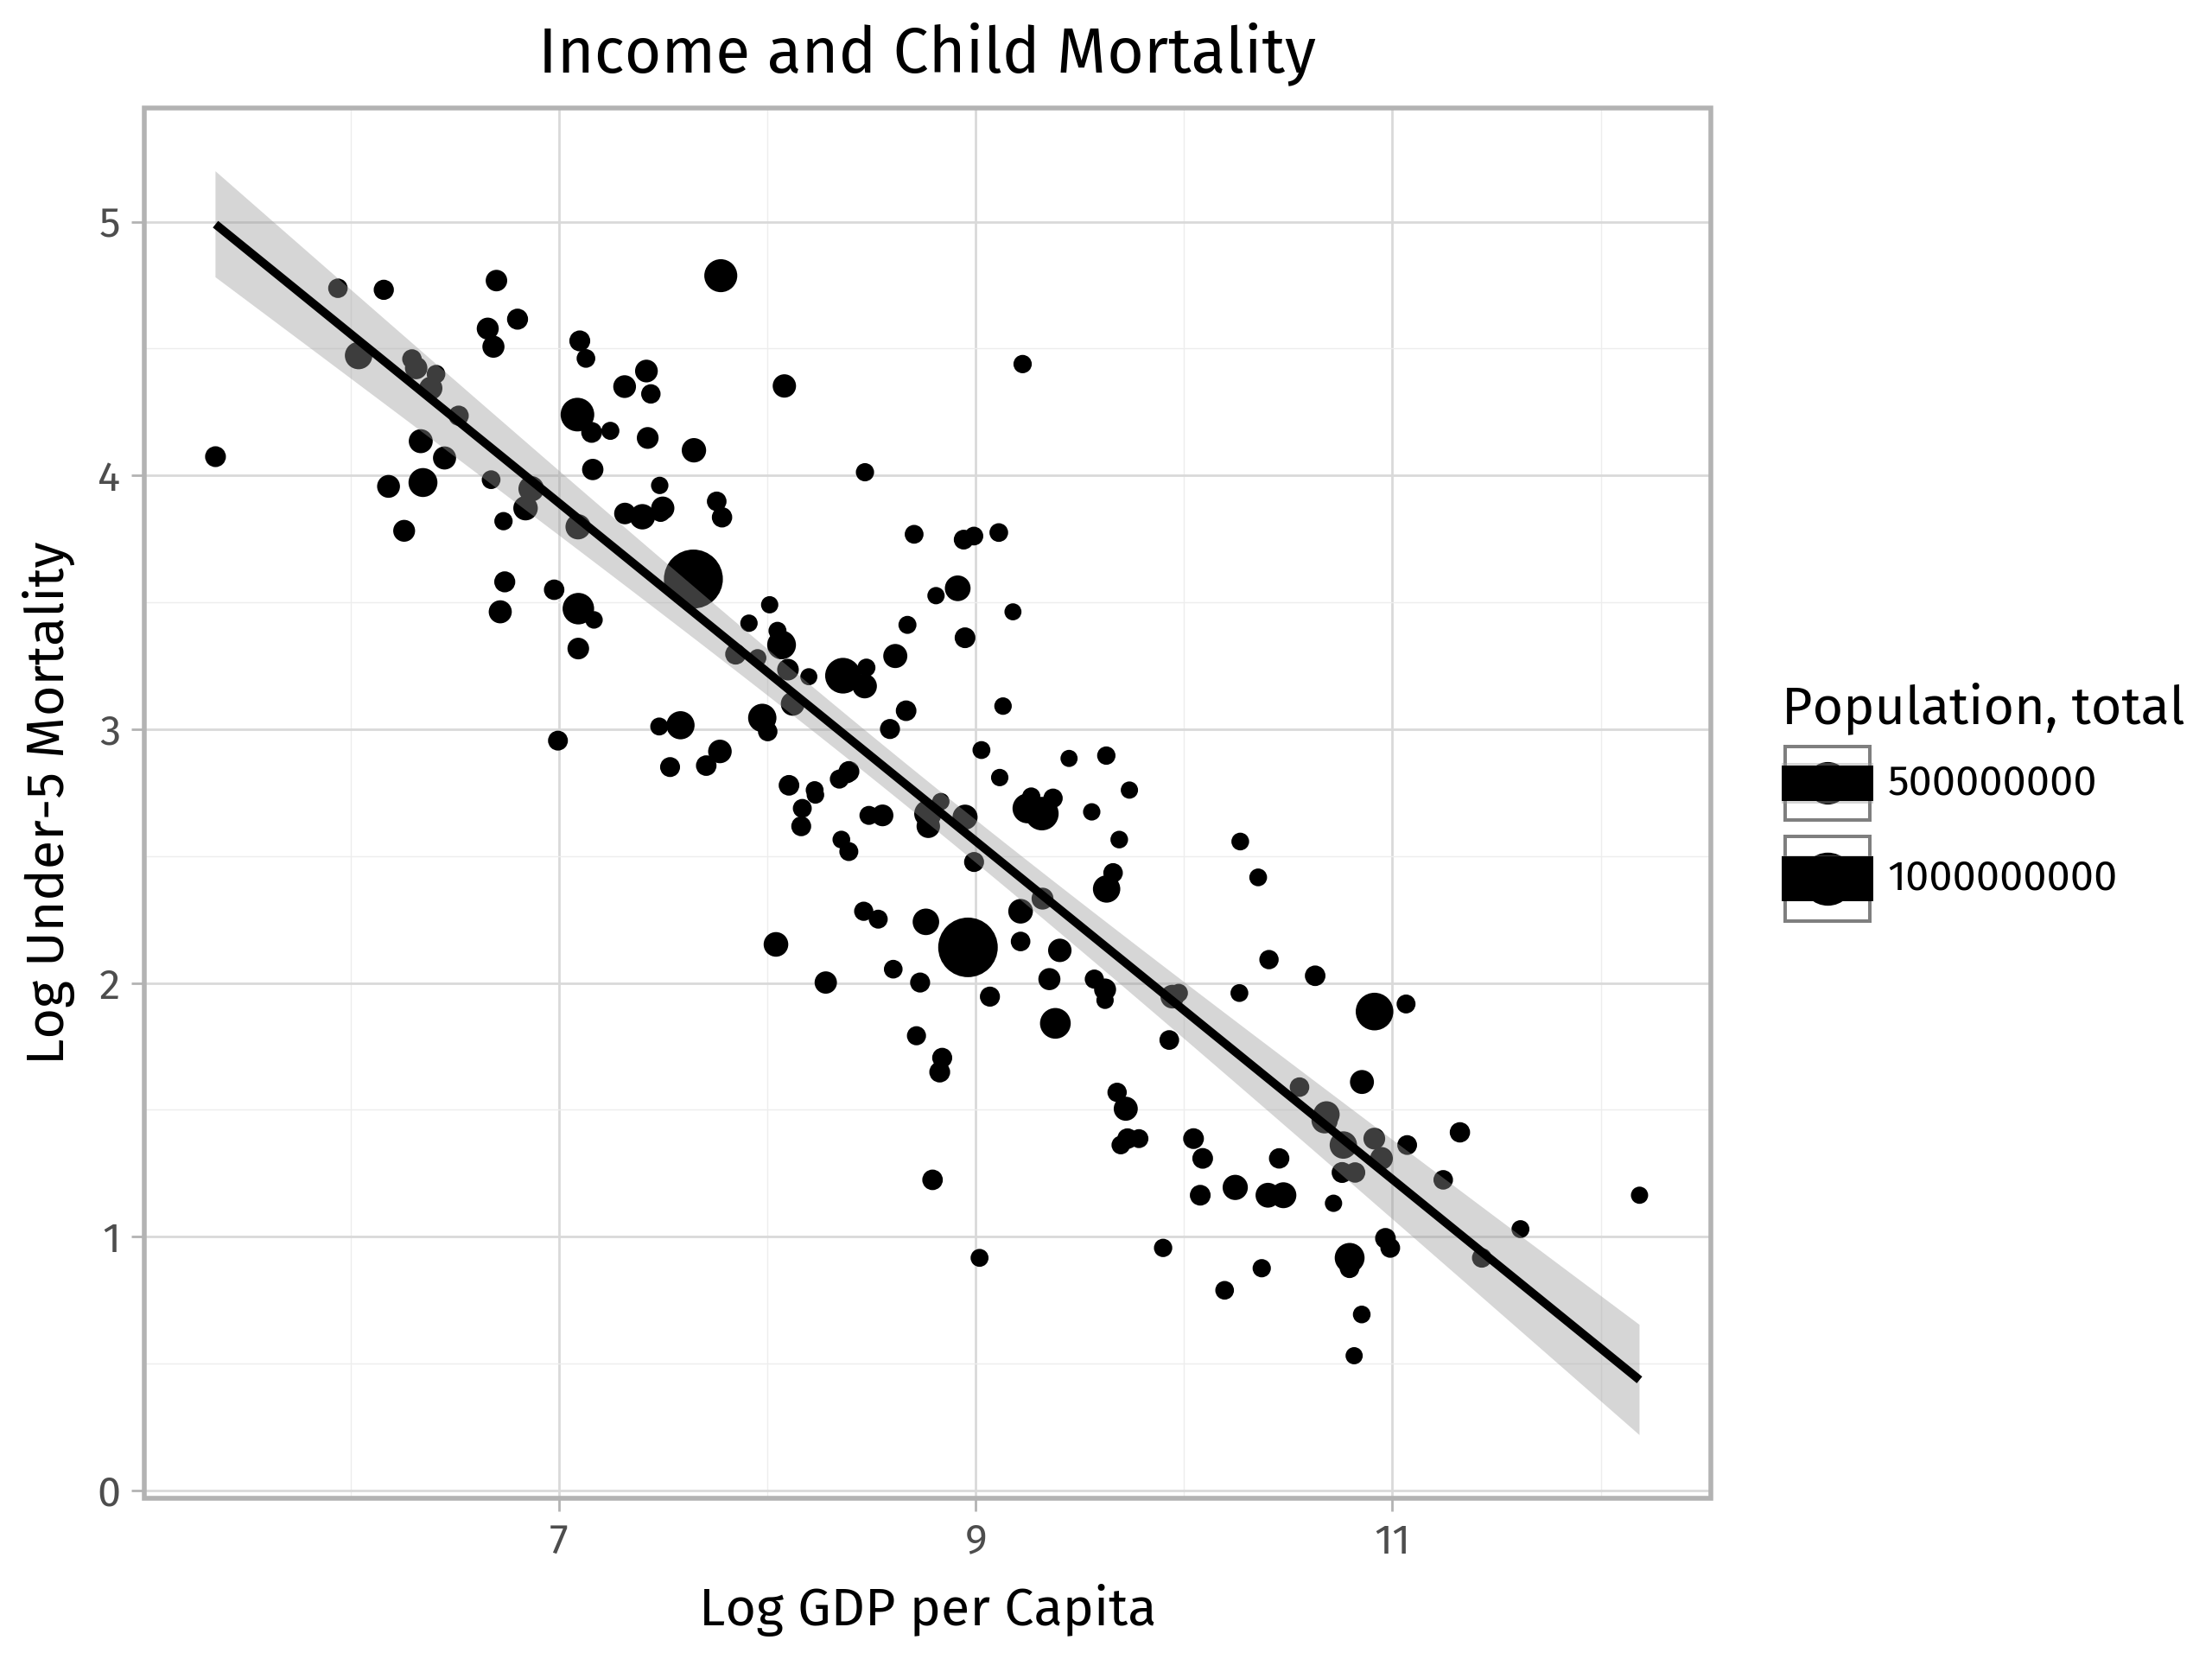

In [32]:
(
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap", y="log_under5_mortality_rate", size="Population, total"
        ),
    )
    + pn.geom_point()
    + pn.geom_smooth(method="lm")
    + pn.labs(
        x="Log GDP per Capita",
        y="Log Under-5 Mortality",
        title="Income and Child Mortality",
    )
    + pn.theme_light(base_family="Fira Sans").to_retina()
)

You can also set a theme globally at load with `set_theme`, for example:

```    
pn.set_theme(pn.theme_light(base_family="Fira Sans").to_retina())
```

## Converting and Editing a plotnine Plot as Matplotlib Axes

One of the best features of plotnine is that is you find plotnine won't do something you want, you can always convert your `plotnine` plot to a matplotlib axes. To do so, simply create a pyplot figure, then use the `.on().show()` methods to add your seaborn Plot to that figures. You can then access the single `axes` object in that figure with `f.axes[0]` and edit the way you would any pyplot axes object.

(you do seem to need the `.show()` after the `.on()`!)

Note that you won't always see the result in the window (as below) if you're working with a Jupyter Notebook or other interactive visualization tool, but the saved image will have all relevant edits.

Here's what I see when I load the saved image:

![Reload saved image](img/seaborn_w_matplotlib_title.png)

/Users/nce8/github/plotnine/plotnine/layer.py:370: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


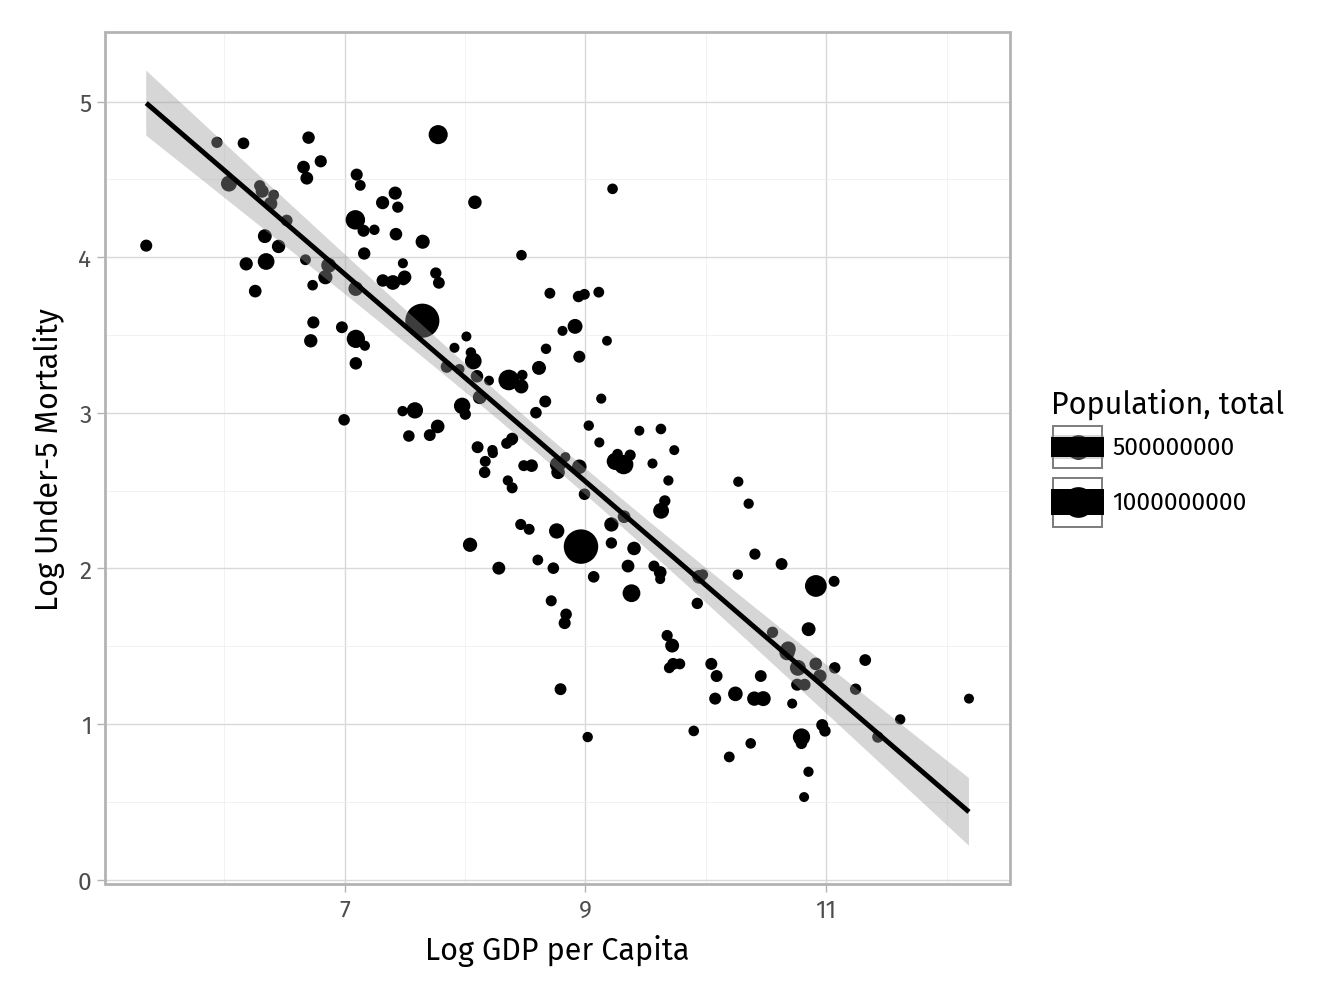

In [59]:
import matplotlib.pyplot as plt

p = (
    pn.ggplot(
        world,
        pn.aes(
            x="log_gdp_per_cap", y="log_under5_mortality_rate", size="Population, total"
        ),
    )
    + pn.geom_point()
    + pn.geom_smooth(method="lm")
    + pn.labs(
        x="Log GDP per Capita",
        y="Log Under-5 Mortality",
    )
    + pn.theme_light(base_family="Fira Sans").to_retina()
)

# Assuming only one axes
fig = p.draw()
ax = fig.get_axes()[0]

# Show with `fig` (ax won't plot)
fig

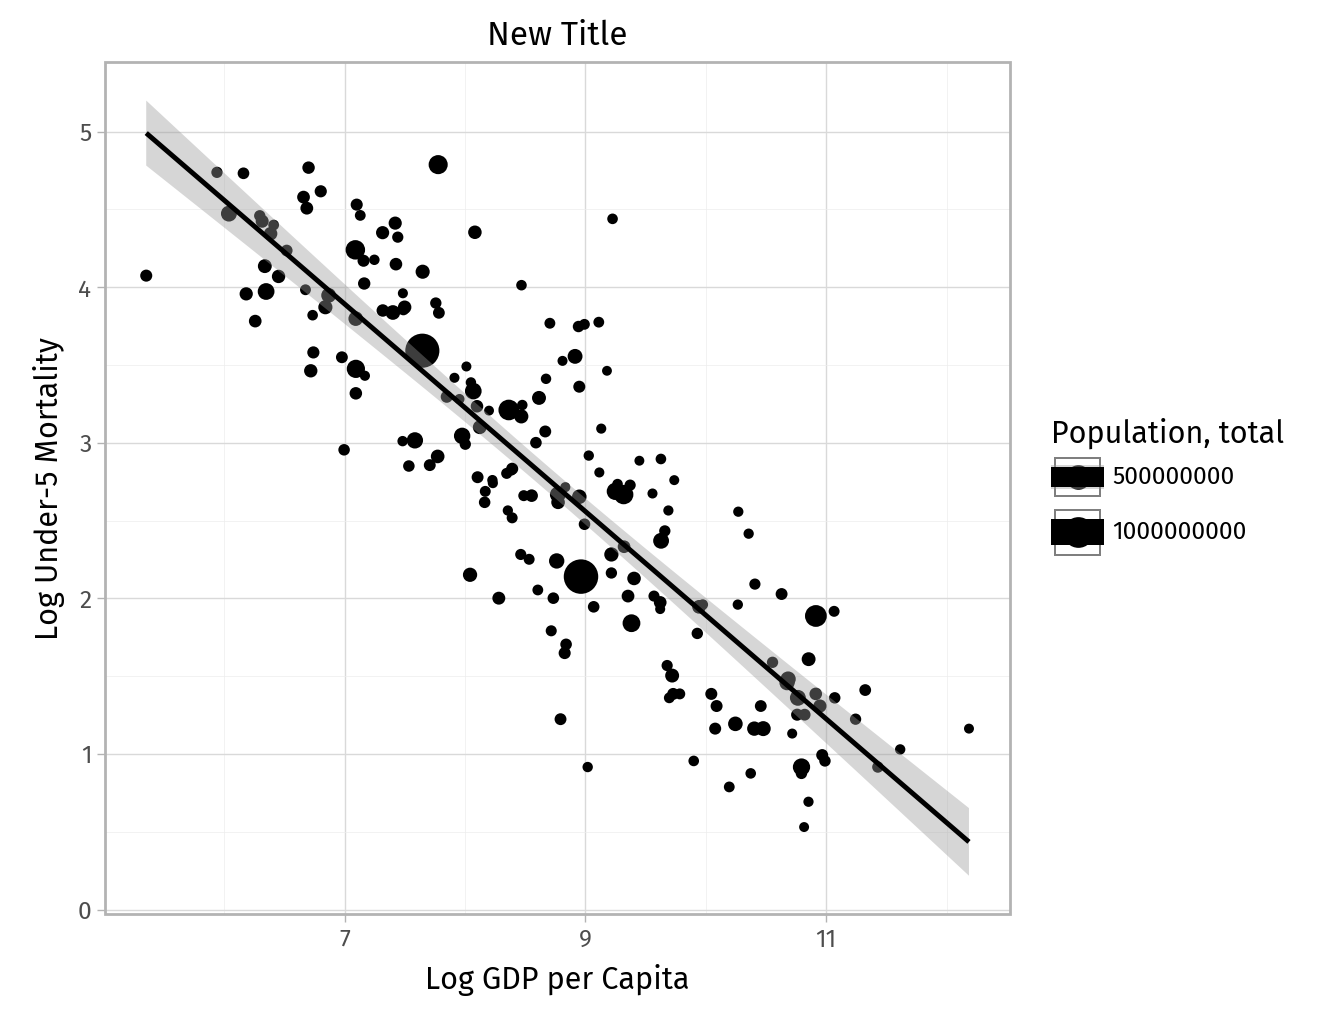

In [60]:
ax.set_title("New Title")
fig

Note you aren't *exactly* getting back a pyplot object. For example, you can't grab elements by name as you would with a pyplot object, and if you set something that was already created by plotnine, they'll overlap one another:

In [65]:
ax.get_xlabel()

'test'

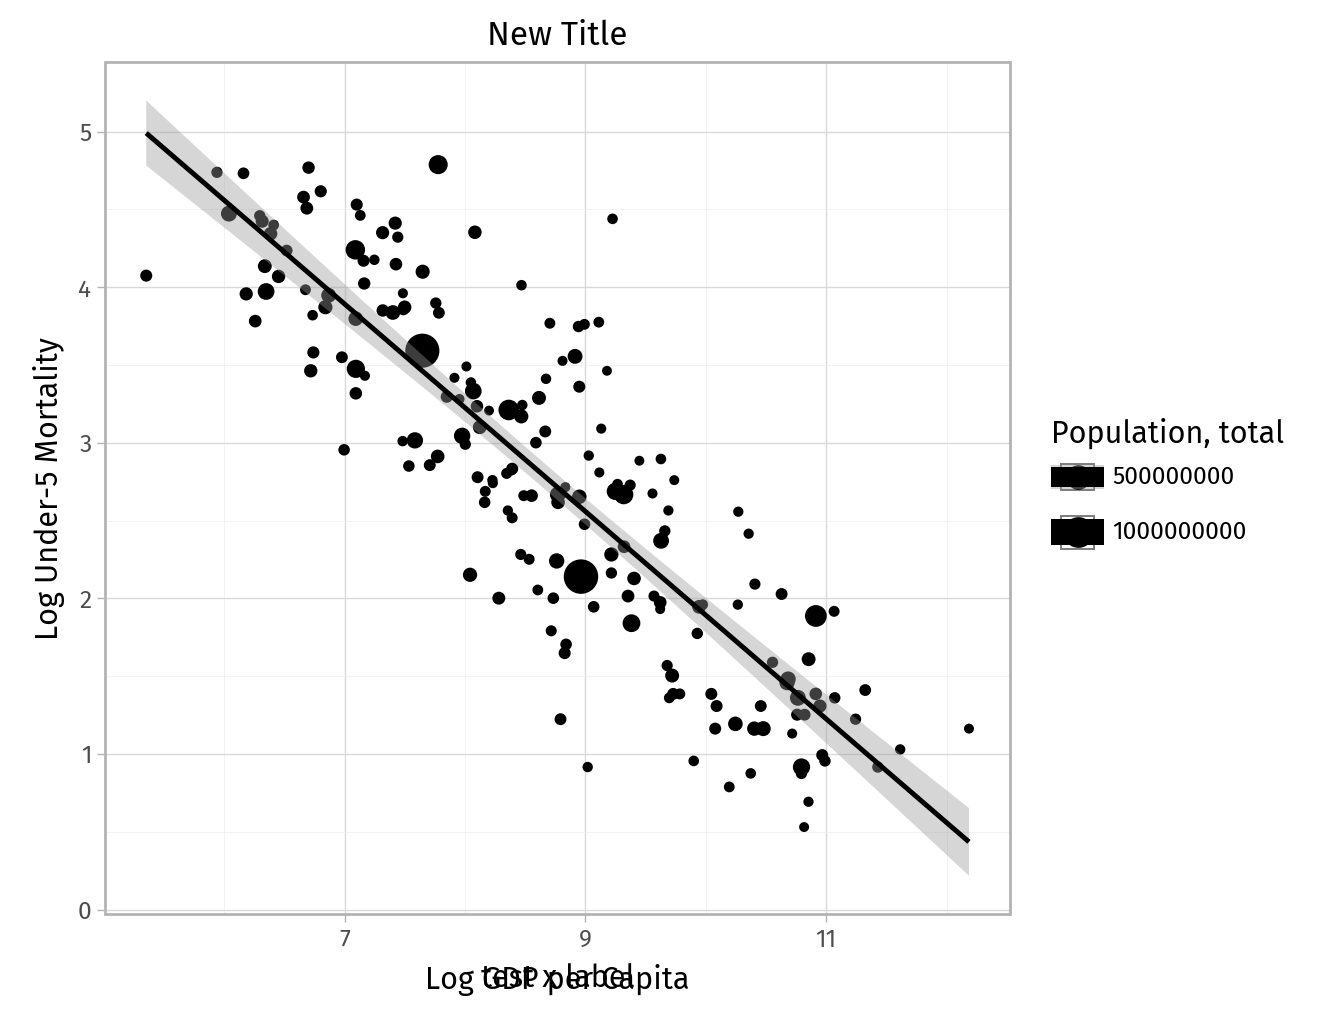

In [67]:
ax.set_xlabel("test x label")
fig

But it is handy!

## Next Up

In our next reading, we'll turn to the plotting backend that underlies, `matplotlib`. The fact that plotnine is backed by matplotlib it means that any time you find there's something you want to do that plotnine hasn't implemented, you can always fall back into matplotlib to make additional edits. So you feel comfortable doing so, we'll spend a little time exploring matplotlib itself.